In [37]:
import pandas as pd

import numpy as np

In [38]:
df = pd.read_parquet('src/eval.parquet')

In [42]:
df

,label,video_name,embeddings
0,7,354.mp4,"[0.022952795, 0.0318711, 0.013222513, 0.012283..."
1,0,385.mp4,"[0.0219932, 0.024311809, 0.013341469, 0.017193..."
2,5,35-30-1920x1080.mp4,"[0.023765814, 0.02109409, 0.010337546, 0.00710..."
3,5,9-15-1920x1080.mp4,"[0.041213766, 0.033971775, 0.022762295, 0.0290..."
4,0,video1.mp4,"[0.0037426758, 0.03160652, 0.016981002, 0.0090..."
...,...,...,...
10948,5,9-15-1920x1080.mp4,"[0.028071173, 0.022289196, 0.033133704, 0.0144..."
10949,0,112-30-640x360.mp4,"[0.017834289, 0.035219584, 0.025632882, 0.0127..."
10950,6,video73.mp4,"[0.03225162, 0.01354498, 0.017428184, 0.010039..."
10951,5,139-14-720x480.mp4,"[0.023991225, 0.026364977, 0.015291575, 0.0138..."


In [61]:
df['label'] = df['label'].astype(int)

In [49]:
df.groupby('label')['embeddings'].count().to_frame()

,embeddings
label,
0,2388
1,117
2,63
3,171
4,1497
5,4473
6,1340
7,904


In [47]:
df.groupby('video_name')['embeddings'].count().to_frame()

,embeddings
video_name,
112-30-640x360.mp4,492
13-30-1920x1080.mp4,738
139-14-720x480.mp4,960
25-25-600x480.mp4,454
27-60-1280x720.mp4,40
28-30-1280x720-1.mp4,26
35-30-1920x1080.mp4,973
354.mp4,396
365.mp4,71


In [50]:
classes = {'Neutral': 0, 'Anger': 1, 'Disgust': 2, 'Fear': 3, 'Happiness': 4, 'Sadness': 5, 'Surprise': 6, 'Other': 7}

In [52]:
classes_encoder = {value: key for key, value in classes.items()}

In [54]:
classes_encoder

{0: 'Neutral',
 1: 'Anger',
 2: 'Disgust',
 3: 'Fear',
 4: 'Happiness',
 5: 'Sadness',
 6: 'Surprise',
 7: 'Other'}

In [63]:
df['label'] = df['label'].replace(classes_encoder)

In [90]:
def compute_similarity(df: pd.DataFrame):
    a = np.array(df['embeddings'].to_list())
    result_matrix = a @ a.T
    
    out = np.ones(result_matrix.shape,dtype=bool)
    np.fill_diagonal(out,0)
    
    return result_matrix[out].mean()

In [91]:
metric_dict = dict()

for name, group in df.groupby('label'):
    metric_dict[name] = compute_similarity(group)

In [93]:
# class similarity
metric_dict

{'Anger': 0.95489836,
 'Disgust': 0.961978,
 'Fear': 0.9444179,
 'Happiness': 0.9600662,
 'Neutral': 0.9497977,
 'Other': 0.9599784,
 'Sadness': 0.9546495,
 'Surprise': 0.95705706}

In [94]:
metric_video_dict = dict()

for name, group in df.groupby('video_name'):
    metric_video_dict[name] = compute_similarity(group)

In [97]:
# video similarity
metric_video_dict

{'112-30-640x360.mp4': 0.9523227,
 '13-30-1920x1080.mp4': 0.96575624,
 '139-14-720x480.mp4': 0.9562844,
 '25-25-600x480.mp4': 0.964172,
 '27-60-1280x720.mp4': 0.98131746,
 '28-30-1280x720-1.mp4': 0.9790491,
 '35-30-1920x1080.mp4': 0.9775921,
 '354.mp4': 0.97760427,
 '365.mp4': 0.97394997,
 '369.mp4': 0.98792684,
 '381.mp4': 0.9712759,
 '384.mp4': 0.9641257,
 '385.mp4': 0.988396,
 '387.mp4': 0.97278637,
 '388.mp4': 0.9637534,
 '429.mp4': 0.9800573,
 '439.mp4': 0.9745687,
 '447.mp4': 0.97656125,
 '57-25-426x240.mp4': 0.9919651,
 '87-25-1920x1080.mp4': 0.982033,
 '9-15-1920x1080.mp4': 0.9535292,
 'video1.mp4': 0.9574089,
 'video2.mp4': 0.9625356,
 'video34.mp4': 0.9661621,
 'video73.mp4': 0.97084695}

In [98]:
# whole similarity
compute_similarity(df)

0.95223886

In [106]:
df[df['label']=='Anger']['video_name'].value_counts()

video_name
9-15-1920x1080.mp4      63
28-30-1280x720-1.mp4    25
video73.mp4             17
369.mp4                 10
video34.mp4              1
365.mp4                  1
Name: count, dtype: int64

In [167]:
neutral = df[(df['label']=='Happiness')]['embeddings'].to_list()

In [174]:
anger = df[(df['label']=='Sadness')]['embeddings'].to_list()

In [175]:
#similarity between opposite emotions (neutral and anger)
negative_score = (np.array(neutral) @ np.array(anger).T).reshape(len(neutral) * len(anger))

In [176]:
def compute_similarity_vector(df: pd.DataFrame):
    a = np.array(df['embeddings'].to_list())
    result_matrix = a @ a.T
    
    out = np.ones(result_matrix.shape,dtype=bool)
    np.fill_diagonal(out,0)
    
    return result_matrix[out]

In [177]:
positive_score = compute_similarity_vector(df[(df['label']=='Happiness')])

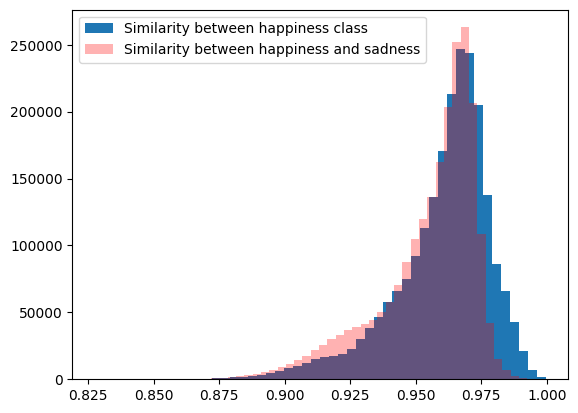

In [180]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.hist(positive_score[:len(negative_score)], label='Similarity between happiness class', bins=50)
_ = ax.hist(negative_score[:len(positive_score)], color='red', alpha=.3, label='Similarity between happiness and sadness', bins=50)

ax.legend()

<AxesSubplot: >

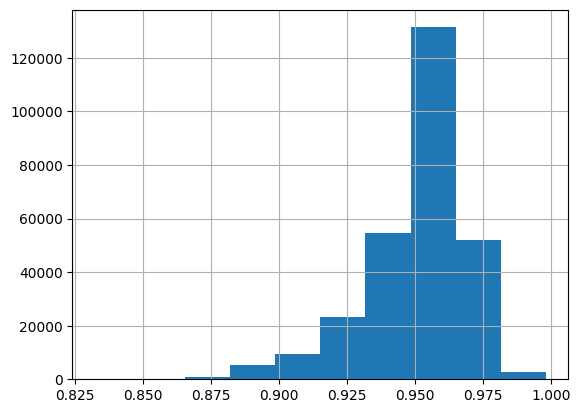

In [154]:
pd.Series(negative_score).hist()

<AxesSubplot: >

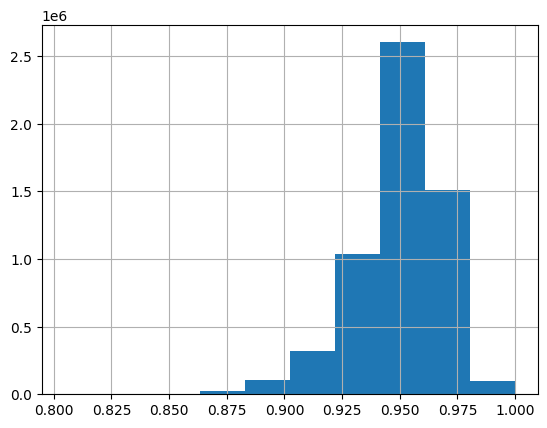

In [159]:
pd.Series(positive_score).hist()

In [128]:
df

,label,video_name,embeddings
0,Other,354.mp4,"[0.022952795, 0.0318711, 0.013222513, 0.012283..."
1,Neutral,385.mp4,"[0.0219932, 0.024311809, 0.013341469, 0.017193..."
2,Sadness,35-30-1920x1080.mp4,"[0.023765814, 0.02109409, 0.010337546, 0.00710..."
3,Sadness,9-15-1920x1080.mp4,"[0.041213766, 0.033971775, 0.022762295, 0.0290..."
4,Neutral,video1.mp4,"[0.0037426758, 0.03160652, 0.016981002, 0.0090..."
...,...,...,...
10948,Sadness,9-15-1920x1080.mp4,"[0.028071173, 0.022289196, 0.033133704, 0.0144..."
10949,Neutral,112-30-640x360.mp4,"[0.017834289, 0.035219584, 0.025632882, 0.0127..."
10950,Surprise,video73.mp4,"[0.03225162, 0.01354498, 0.017428184, 0.010039..."
10951,Sadness,139-14-720x480.mp4,"[0.023991225, 0.026364977, 0.015291575, 0.0138..."


In [132]:
# happines and sadness
df.iloc[-1]['embeddings'] @ df.iloc[-2]['embeddings'].T

0.9428461